In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("CardioGoodFitness.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [6]:
df.shape

(180, 9)

In [7]:
df.size

1620

In [8]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    180
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


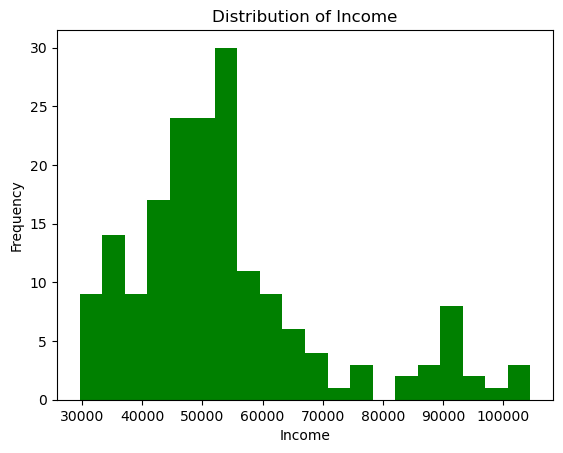

In [13]:
plt.hist(df['Income'], bins=20, color='green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

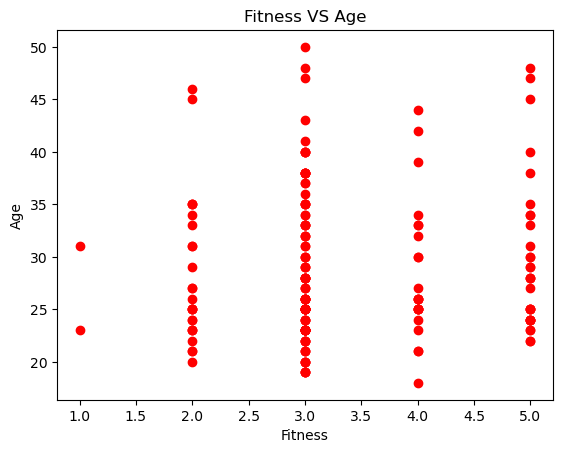

In [14]:
plt.scatter(df['Fitness'],df['Age'],color='red')
plt.xlabel('Fitness')
plt.ylabel('Age')
plt.title('Fitness VS Age')
plt.show()

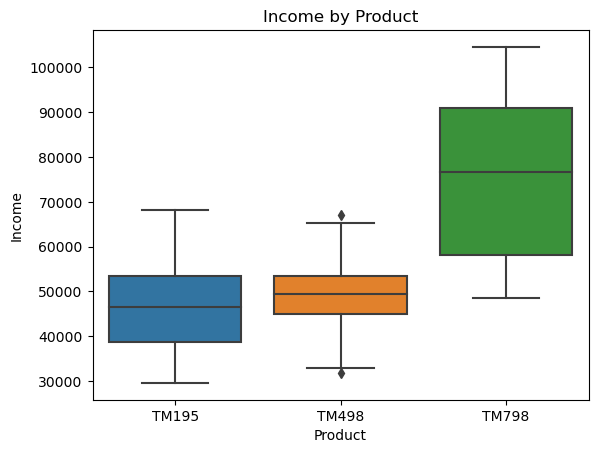

In [15]:
#create a boxplot of the ratings by product
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Income by Product')
plt.show()

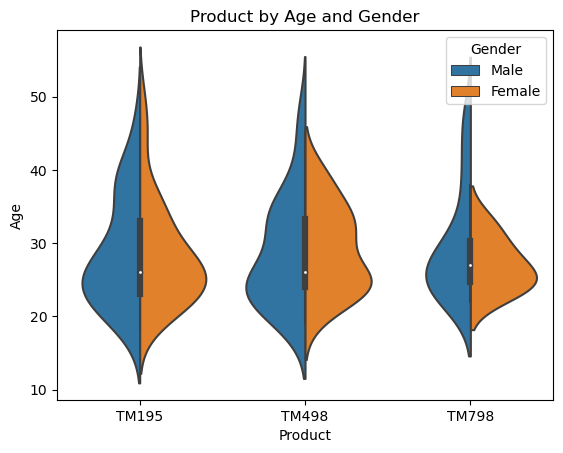

In [16]:
#Create a violin plot of the ratings by product and gender
sns.violinplot(x='Product', y='Age', hue='Gender', data=df, split=True)
plt.title('Product by Age and Gender')
plt.show()

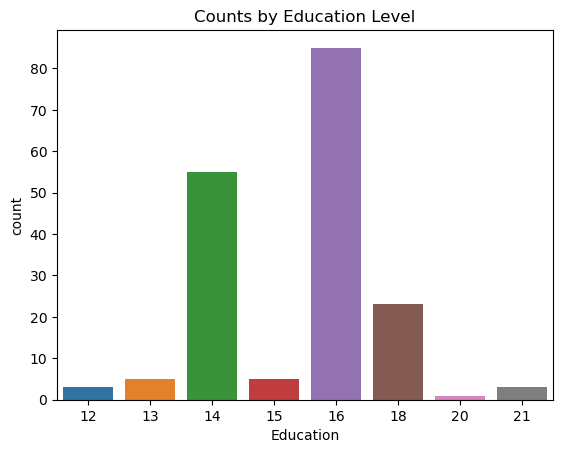

In [17]:
#create a bar chart of the counts by education level
sns.countplot(x='Education', data=df)
plt.title('Counts by Education Level')
plt.show()

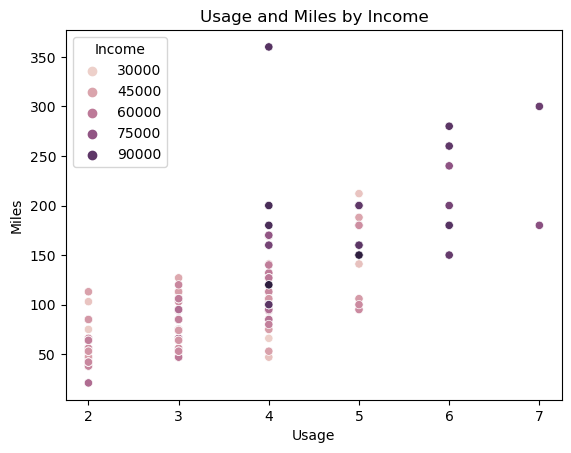

In [18]:
#Create a scatter plot of usage and miles by income
sns.scatterplot(x='Usage', y='Miles', hue='Income', data=df)
plt.title('Usage and Miles by Income')
plt.show()

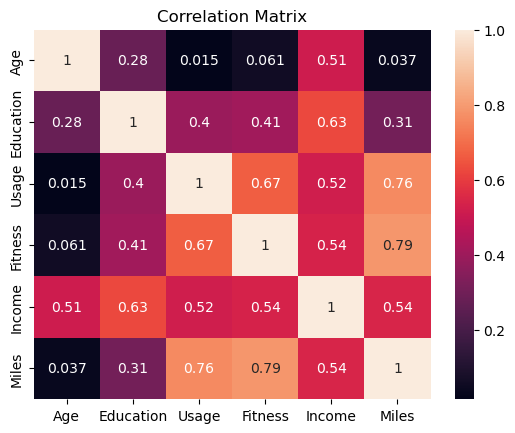

In [19]:
#Create a heatmap of the correlation matrix
corr_matrix = df[['Age','Education','Usage','Fitness','Income','Miles']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

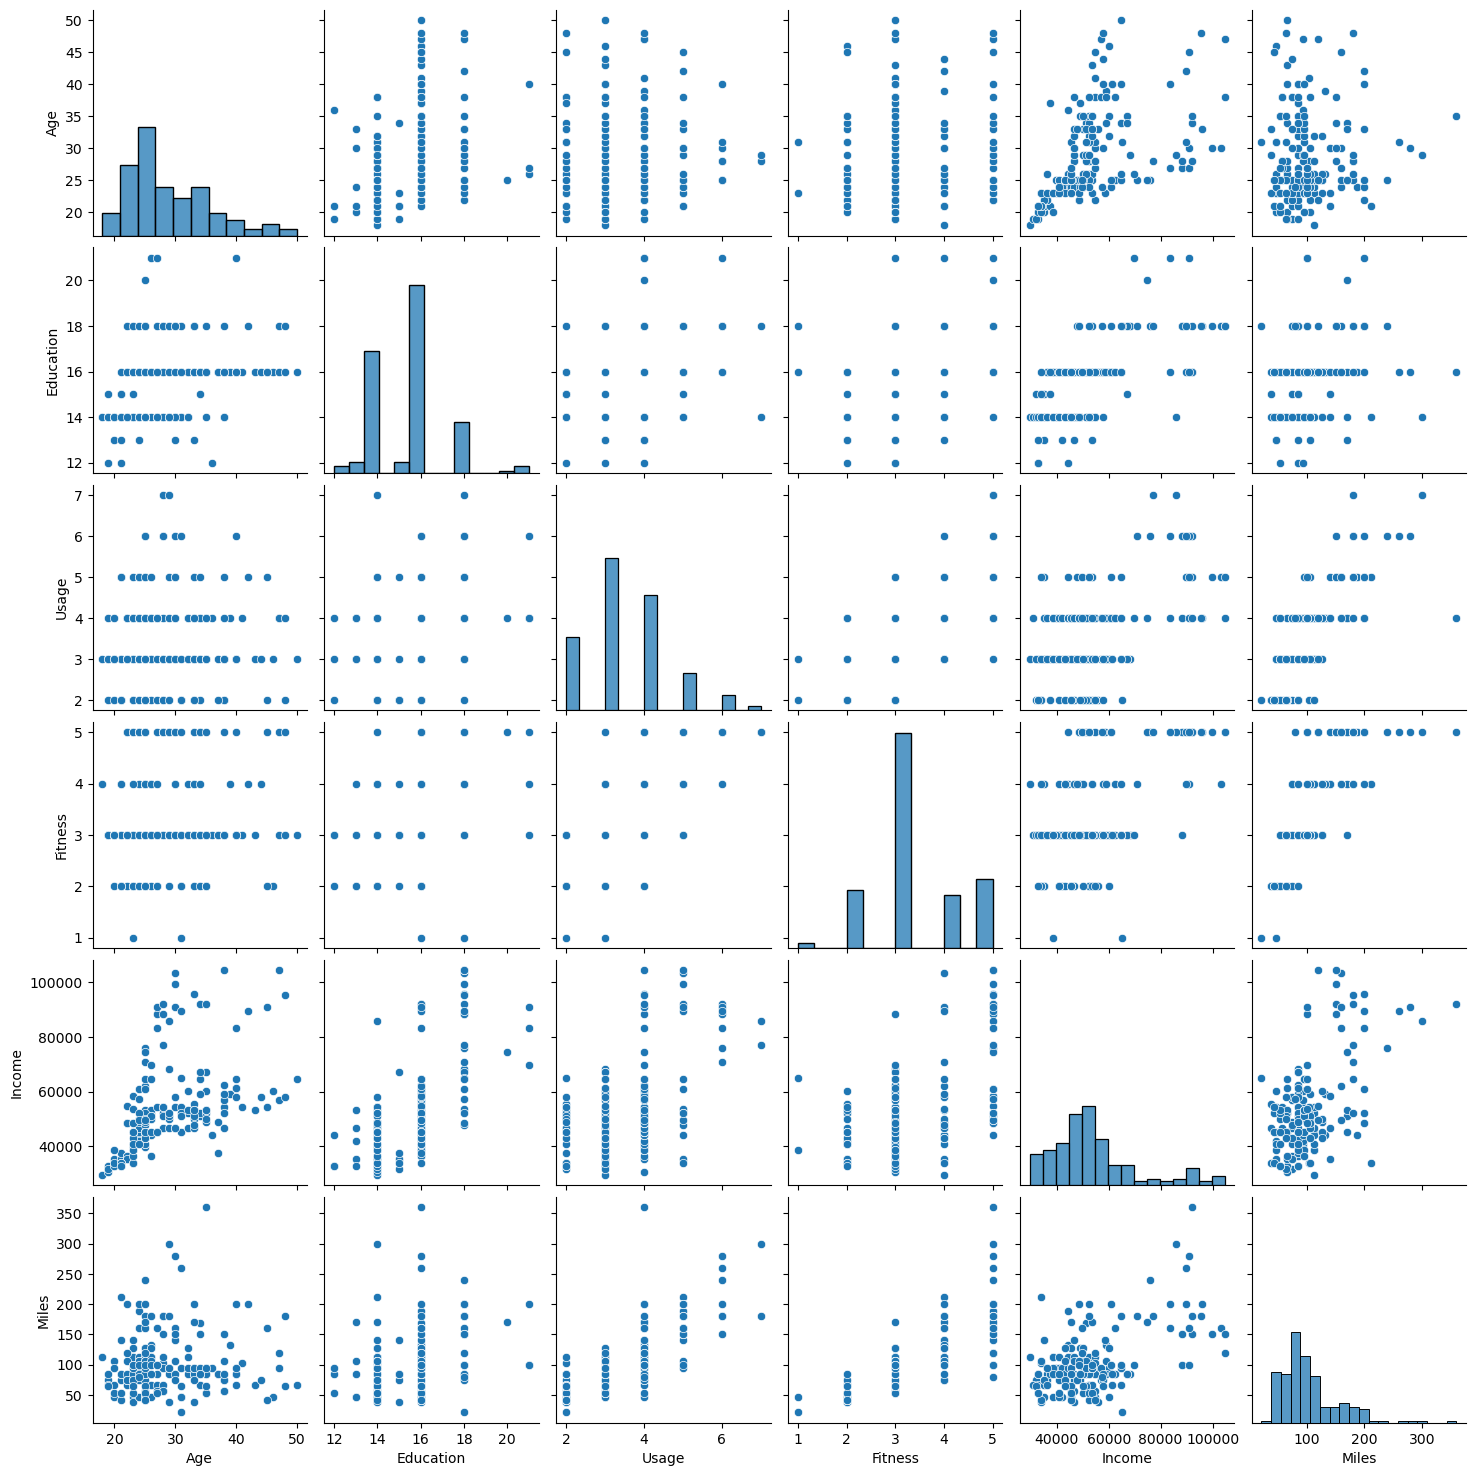

In [20]:
sns.pairplot(df)

In [21]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

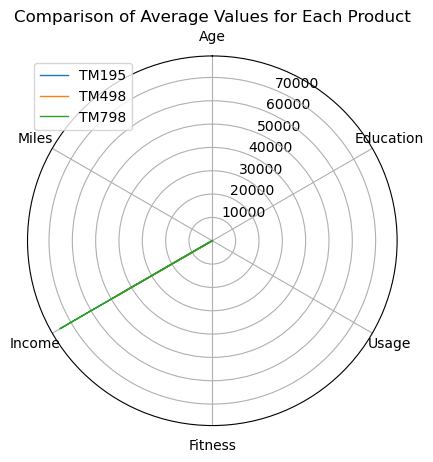

In [29]:
#subset the data by product

df_product1 = df[df['Product'] == 'TM195']
df_product2 = df[df['Product'] == 'TM498']
df_product3 = df[df['Product'] == 'TM798']

#calculate the average values for each column by product
product1_avg =df_product1[['Age', 'Education','Usage', 'Fitness', 'Income','Miles']].mean().values.tolist()
product2_avg =df_product2[['Age', 'Education','Usage', 'Fitness', 'Income','Miles']].mean().values.tolist()
product3_avg =df_product3[['Age', 'Education','Usage', 'Fitness', 'Income','Miles']].mean().values.tolist()

#Create s list of column names

variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

#Create a function to create a radar chart

def create_radar_chart(product_avg , product_name):
    #calculate the angles for each variable
    
    angles = [n/ float(len(variables)) *2* pi for n in range(len(variables))]
    angles +=angles[:1]
    #create a sub-plot with a polar projection
    ax = plt.subplot(111 , polar= True)
    
    # set the clockwise direction and start angle at 90 degrees
    
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)
    
    #add the first product values as a line
    
    values = product_avg + product_avg[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=product_name)
    ax.fill(angles, values, alpha=0.1)
    
    #add the column names as labels
    plt.xticks(angles[:-1], variables)
    
    #add a legend and title
    
    plt.legend(loc='upper left')
    plt.title('Comparison of Average Values for Each Product')
    
    
#Create the radar chart for each product
    
create_radar_chart(product1_avg,'TM195')
create_radar_chart(product2_avg,'TM498')
create_radar_chart(product3_avg,'TM798')
    
# show the plot
    
plt.show()

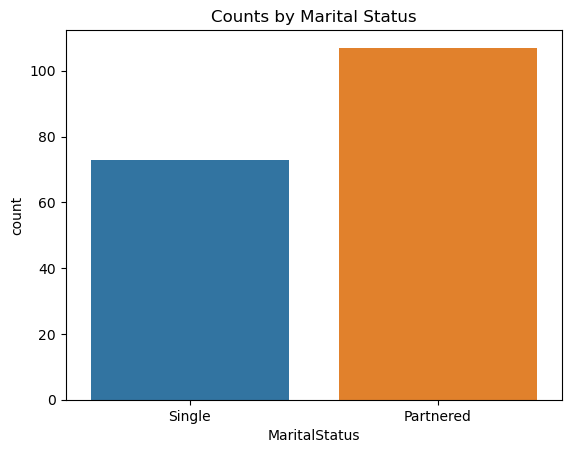

In [30]:
sns.countplot(x='MaritalStatus', data=df)
plt.title('Counts by Marital Status')
plt.show()

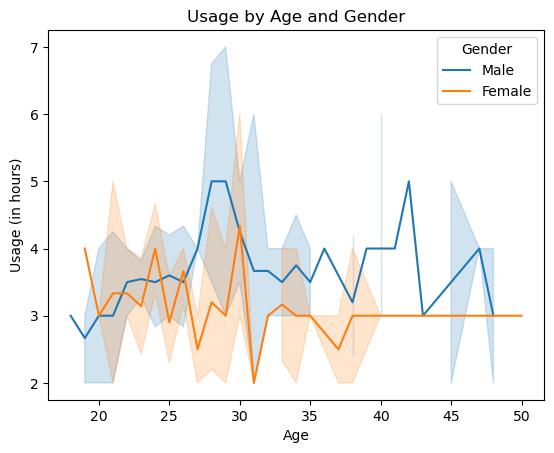

In [31]:
sns.lineplot(x='Age', y='Usage',hue='Gender', data=df)
plt.title('Usage by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Usage (in hours)')
plt.show()